In [1]:
#######################Linear and nonlinear regression Closed-form, GD & SGD#########################
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(0,2*np.pi,0.1)
X = X.reshape([np.size(X),1])
y = np.sin(X)

In [2]:
w_cl= np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
w_cl

array([[-0.07720218]])

In [3]:
# GD
w_gd = np.zeros(np.shape(X)[1])
w_gd = w_gd.reshape(np.shape(X)[1],1)
jj=0
alpha = 0.002
while jj<100:
    w_gd = w_gd - alpha *np.matmul(X.T , (np.matmul(X,w_gd) - y))
    jj += 1
w_gd

array([[-0.07720218]])

In [4]:
# SGD
w_sgd = np.zeros(np.shape(X)[1])
jj=0
alpha = 0.002
while jj<80:
    for i in range(np.shape(X)[0]):
        w_sgd = w_sgd + alpha*X[i,:] * (y[i] - np.matmul(w_sgd.T,X[i,:]))
    jj += 1
w_sgd

array([-0.0902147])

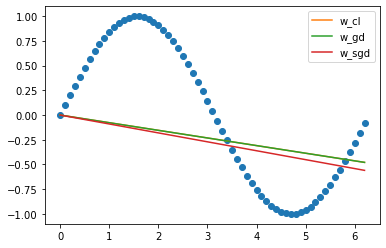

In [5]:
plt.plot(X,y,'o')
plt.plot(X,np.matmul(X,w_cl),label = "w_cl")
plt.plot(X,np.matmul(X,w_gd),label = "w_gd")
plt.plot(X,np.matmul(X,w_sgd),label = "w_sgd")


plt.legend(loc = "upper right")
plt.show()

In [6]:
#########################Feature Engineering#################################
num =15
l = np.random.choice(len(X),num)
l = X[l,:]
l = np.unique(l)
beta = 0.5
similarities = {}
for x in X[:,0]:
    for i in l:
        similarities[x,i] =  np.exp(-beta * np.abs(x-i)**2 )
new_x = np.array(list(similarities.values()))
new_x = new_x.reshape([np.shape(X)[0] , np.size(l)])

In [7]:
w_cl = np.matmul(np.linalg.inv(np.matmul(new_x.T,new_x)),np.matmul(new_x.T,y))
w_cl

array([[-8.92800342e+03],
       [ 7.42981719e+04],
       [-1.00991656e+05],
       [ 4.24706797e+04],
       [-3.61140801e+04],
       [ 4.40874980e+04],
       [-3.08348760e+04],
       [ 1.74453975e+04],
       [-4.72022119e+03],
       [ 3.30827112e+03],
       [-3.52229285e+01],
       [ 1.21185837e+01]])

In [8]:
# GD
w_gd = np.zeros(np.shape(new_x)[1])
w_gd = w_gd.reshape(np.shape(new_x)[1],1)
jj=0
alpha = 0.002
while jj<1000:
    w_gd = w_gd - alpha *np.matmul(new_x.T , (np.matmul(new_x,w_gd) - y))
    jj += 1
w_gd

array([[-0.1768299 ],
       [-0.00186194],
       [ 0.08124868],
       [ 0.22666361],
       [ 0.38593709],
       [ 0.33717388],
       [ 0.18645448],
       [ 0.10814174],
       [-0.11636465],
       [-0.1471699 ],
       [-0.50696309],
       [-0.41756909]])

In [9]:
# SGD
w_sgd = np.zeros(np.shape(new_x)[1])
jj=0
alpha = 0.002
while jj<80:
    for i in range(np.shape(new_x)[0]):
        w_sgd = w_sgd + alpha*new_x[i,:] * (y[i] - np.matmul(w_sgd.T,new_x[i,:]))
    jj += 1
w_sgd

array([-0.00242504,  0.05038243,  0.0783394 ,  0.13429216,  0.26539569,
        0.26845283,  0.21904142,  0.16871517, -0.09314863, -0.1350868 ,
       -0.4764755 , -0.46785016])

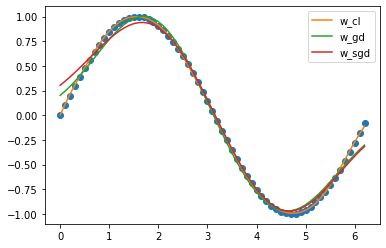

In [10]:
plt.plot(X,y,'o')
plt.plot(X,np.matmul(new_x,w_cl),label = "w_cl")
plt.plot(X,np.matmul(new_x,w_gd),label = "w_gd")
plt.plot(X,np.matmul(new_x,w_sgd),label = "w_sgd")


plt.legend(loc = "upper right")
plt.show()